IMPORTING  NECESSARY  LIBRARIES

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

EXTRACTING  IMAGE  FROM  FILES  AND  CONVERTING  TO  GRAY  SCALE  IMAGES

In [2]:
img = cv2.imread(r"car1.png")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # converting to gray scale for reducing computation time

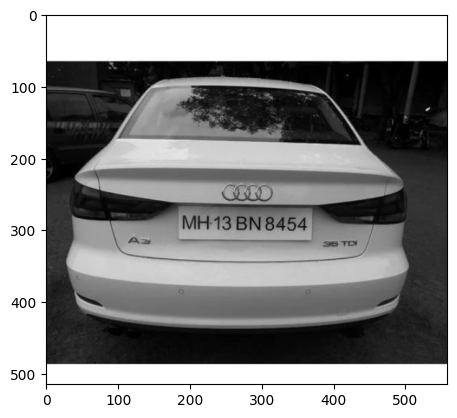

In [3]:
# PLOTTING  IMAGES
plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_BGR2RGB))
plt.show()

APPLY  EDGE  FILTERS

In [4]:
'''  --> we use 'cv2.bilateralfilter' and 'cv2.Canny().'
     (*) cv2.bilateralfilter() : used for reducing noise, smoothening images, preserving edges.
     --> edge means the boundary of an image which tells the shape of an image removing noises.
     --> edge detection means detecting those boundaries of an image without changing the meaning 
         of the image and by reducing noises from an image.
     
     (*)cv2.Canny()   :
             --> in previous step we discussed about edge detection no , that edge detection is done by Canny function.
             --> Canny accepts image in form of gray scale.
             --> Reduces noises from image and returns edges of image
             --> 'apertureSize' used to detect more detailed features of an image,
                  .) the range is between 3 and 7 (odd only) and default is 3 more value of 
                     apertureSize ===> more details.
                  .) apertureSize specifies the order of sobel filter by calculating gradient
                     of sobel filter.'''

"  --> we use 'cv2.bilateralfilter' and 'cv2.Canny().'\n     (*) cv2.bilateralfilter() : used for reducing noise, smoothening images, preserving edges.\n     --> edge means the boundary of an image which tells the shape of an image removing noises.\n     --> edge detection means detecting those boundaries of an image without changing the meaning \n         of the image and by reducing noises from an image.\n     \n     (*)cv2.Canny()   :\n             --> in previous step we discussed about edge detection no , that edge detection is done by Canny function.\n             --> Canny accepts image in form of gray scale.\n             --> Reduces noises from image and returns edges of image\n             --> 'apertureSize' used to detect more detailed features of an image,\n                  .) the range is between 3 and 7 (odd only) and default is 3 more value of \n                     apertureSize ===> more details.\n                  .) apertureSize specifies the order of sobel filter by

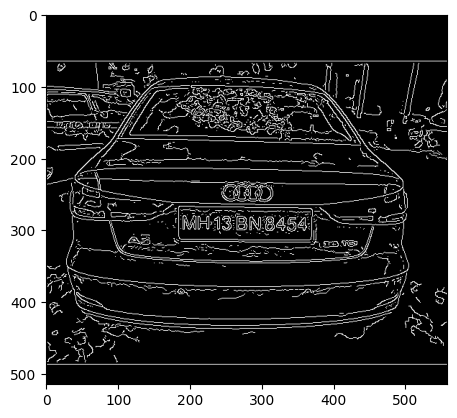

In [5]:
bfilter = cv2.bilateralFilter(gray_img,11,17,17) # noise reduction
edged = cv2.Canny(bfilter,30,200,apertureSize=5) # edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# FIND  CONTOURS  AND  APPLY  MASK
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# cv2.RETR_TREE finds all contour lines of a given img
# cv2.CHAIN_APPROX_SIMPLE returns end points necessary for drawing contour lines
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea,reverse=True)
# cv2.contourArea returns the contourArea

In [7]:
loc = None
for c in contours:
    approx = cv2.approxPolyDP(c,10,True)
    if(len(approx)==4):
        loc = approx
        break
# cv2.approxPolyDP() : computes the approximate contour points

In [8]:
loc

array([[[184, 268]],

       [[187, 313]],

       [[369, 309]],

       [[368, 270]]], dtype=int32)

In [9]:
gray_img.shape

(515, 559)

In [10]:
mask = np.zeros(gray_img.shape,np.uint8)
# uint8 means unsigned integer 8 bits generally used for image s where colour code is from 0 to 255
new_img = cv2.drawContours(mask,[loc],0,255,-1)
new_img = cv2.bitwise_and(img,img,mask=mask)

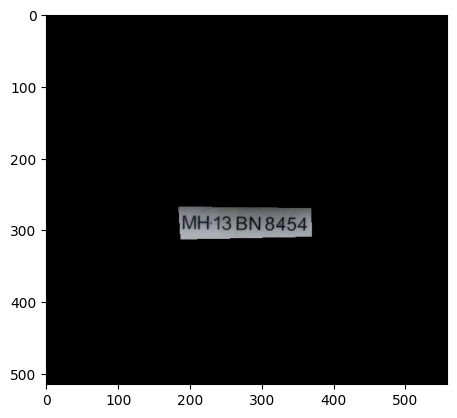

In [11]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [12]:
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_img = gray_img[x1:x2+1 , y1:y2+1]

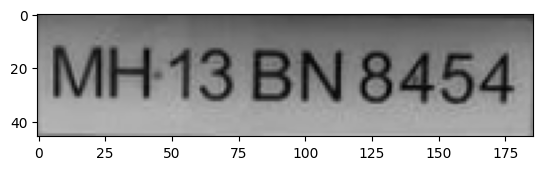

In [13]:

plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

TIME  TO  USE  EASY  OCR

In [14]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_img)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 10], [184, 10], [184, 40], [2, 40]],
  'MH 13 BN 8454',
  0.356953019023104)]

In [15]:
# plot result
txt = result[0][-2]
txt

'MH 13 BN 8454'

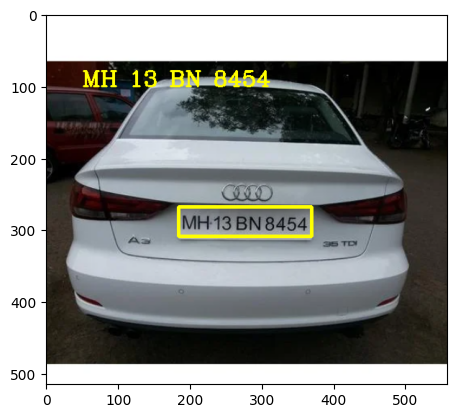

In [16]:
font = cv2.FONT_HERSHEY_COMPLEX
res = cv2.putText(img,text=txt,org = (50,100),fontFace=font,fontScale=1,color=(0,255,255),thickness=2)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,255),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

In [17]:
# now instead of create a database we create a dataframe containing few numberplates as one / main column
# then whichever number plate we detect by using our model we check it w.r.t our created database by using dataframe
# we iterate our dataframe and check it with the number plate we obtained
# if there is a match it returns the details of that car i.e the entire row is returned
# else imposes fine on that car and siezes that car 

In [18]:
import pandas as pd
numdf = pd.DataFrame({'Number_Plates':['MH 13 BN 8454' , 'MHI2 DE1433' , 'DL3C AH0857' , 'Cg 07 M 3773' , 'KA G2MP 9657' , '4460 J4446' , 'RDL9caa9558' , 'HRIOAL2875'],
         'Owner Name':['Manish Pathak','Dinesh Naidu','Jagadish Konda','Anuradha Patel','Sundar Reddy','Narsimha Rao','Ayushi Patel','Arun Kumar'],
         'Challan Imposed(₹)':[2125,5420,8160,5503,890,7851,654,9842],
         'Challan Due to':['Overspeeding','Drunk & Drive','Overspeeding','No Parking','Wrong Route','Signal Jump','Wrong Route','Signal Jump']})
# 'MH 13 BN 8454' , 'MHI2 DE1433_' , 'DL3C AH0857' , 'Cg 07 M 3773' , 'KA G2MP 9657' , '4460 J4446' , 'RDL9caa9558_' , 'HRIOAL2875'

In [19]:
numdf

,Number_Plates,Owner Name,Challan Imposed(₹),Challan Due to
0,MH 13 BN 8454,Manish Pathak,2125,Overspeeding
1,MHI2 DE1433,Dinesh Naidu,5420,Drunk & Drive
2,DL3C AH0857,Jagadish Konda,8160,Overspeeding
3,Cg 07 M 3773,Anuradha Patel,5503,No Parking
4,KA G2MP 9657,Sundar Reddy,890,Wrong Route
5,4460 J4446,Narsimha Rao,7851,Signal Jump
6,RDL9caa9558,Ayushi Patel,654,Wrong Route
7,HRIOAL2875,Arun Kumar,9842,Signal Jump


In [20]:
v = 0
print('-'*50)
for i in numdf['Number_Plates']:
    if(txt==i):
        stmnt = numdf.iloc[v,1:]
        break
    v+=1
if(v==len(numdf)):
    stmnt = "Car not registered !!! Cease the car "
print('-'*50)
print(stmnt)

--------------------------------------------------
--------------------------------------------------
Owner Name            Manish Pathak
Challan Imposed(₹)             2125
Challan Due to         Overspeeding
Name: 0, dtype: object


In [21]:
import tkinter as tk
root = tk.Tk()
root.title("Final Statement")
root_width = 400
root_height = 200

# find screen's height and width
swidth = root.winfo_screenwidth()
sheight = root.winfo_screenheight()

xaxis = (swidth / 2) - (root_width / 2)
yaxis = (sheight / 2) - (root_height / 2)

root.geometry("{}x{}+{}+{}".format(root_width,root_height,int(xaxis),int(yaxis)))
l1 =tk.Label(root,text=stmnt,bd=1,relief="sunken")
l1.pack()
root.mainloop()